Bibliotecas usadas no projeto

In [2]:
import pandas as pd
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.impute import SimpleImputer
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import metrics

In [3]:
house = pd.read_csv(r'C:\Users\Carol\Documents\IronHack\data.submissions\Projetos\ProjectSta\train.csv')

In [4]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Abaixo estou retirando as colunas com muitos nulos. Nesse dataset tem uma categoria NA, acreidto que o python leia isso como NaN. De toda fora optei por recategorizar.

In [6]:
house.drop(['MiscFeature','PoolQC', 'Alley', 'Fence', 'PoolArea'], axis = 1, inplace = True )

In [7]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,12,2008,WD,Normal,250000


Avaliei as colunas com missing values para ver a melhor abordagem para preenche-las, pois a escolhi não dropar inormações a menos que fosse muito necessario.
Recategorizei: LotFrontage, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical,
FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond.

Essa coluna é referente a tamanho e esta em format booleano, optei por preencher os NaN com a média

In [9]:
A = house['LotFrontage'].head()
A

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [10]:
mean = house['LotFrontage'].mean

In [11]:
house['LotFrontage'].fillna(mean(), inplace = True)

Essa coluna é referente ao material da casa. E são poucos missing values então vou categoriza-los como none

In [12]:
B = house['MasVnrType'].head()
B

0    BrkFace
1       None
2    BrkFace
3       None
4    BrkFace
Name: MasVnrType, dtype: object

In [13]:
house['MasVnrType'].fillna('None', inplace = True)

Substitui os mv por 0 pra tentar mminimizar o efeito deles nas regressões, pois o nulo provevelmente significa que não ha esse item na casa.

In [14]:
house['MasVnrArea'].head()

0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
Name: MasVnrArea, dtype: float64

In [15]:
house['MasVnrArea'].fillna( 0 , inplace = True)

Altura do porão categorizada por string. Os missing values substitui por NA(não tem porão)

In [16]:
C = house['BsmtQual'].head()
C

0    Gd
1    Gd
2    Gd
3    TA
4    Gd
Name: BsmtQual, dtype: object

In [17]:
house['BsmtQual'].fillna('NA', inplace = True)

Condição do porão. Usei o mesmo criterio acima, substituindo os mv por NA.

In [18]:
D = house['BsmtCond'].head()
D

0    TA
1    TA
2    TA
3    Gd
4    TA
Name: BsmtCond, dtype: object

In [19]:
house['BsmtCond'].fillna('NA', inplace = True)

Em sua maioria,porão será NA

In [20]:
D = house['BsmtExposure'].head()
D

0    No
1    Gd
2    Mn
3    No
4    Av
Name: BsmtExposure, dtype: object

In [21]:
house['BsmtExposure'].fillna('NA', inplace = True)

Mais uma coluna falando do estado do porão e irei tomar a mesma decisão. Trocar os mv por NA

In [22]:
E = house['BsmtFinType1'].head()
E

0    GLQ
1    ALQ
2    GLQ
3    ALQ
4    GLQ
Name: BsmtFinType1, dtype: object

In [23]:
house['BsmtFinType1'].fillna('NA', inplace = True)

In [24]:
# Por se tratar de uma categoria muito parecida com as anteriores, se tratando de porão, mv serão NA

In [25]:
F = house['BsmtFinType2'].head()
F

0    Unf
1    Unf
2    Unf
3    Unf
4    Unf
Name: BsmtFinType2, dtype: object

In [26]:
house['BsmtFinType2'].fillna('NA', inplace = True)

In [27]:
# Como não é possivel categorizar corretamente o sistema eletrico. Irei substituir os mv por Mix, para não afetar negativamente o dado colocando a opção mais pobre.

In [28]:
G = house['Electrical'].head()
G

0    SBrkr
1    SBrkr
2    SBrkr
3    SBrkr
4    SBrkr
Name: Electrical, dtype: object

In [29]:
house['Electrical'].fillna('Mix', inplace = True)

In [30]:
# Como não podemos categorizar corretamente se há ou não saida de incendio. Optei por substituir o NaN por NA

In [31]:
H = house['FireplaceQu'].head()
H

0    NaN
1     TA
2     TA
3     Gd
4     TA
Name: FireplaceQu, dtype: object

In [32]:
house['FireplaceQu'].fillna('NA', inplace = True)

In [33]:
#Como não podemos categorizar corretamente a garagem. Optei por substituir o NaN por NA

In [34]:
I = house['GarageType'].head()
I

0    Attchd
1    Attchd
2    Attchd
3    Detchd
4    Attchd
Name: GarageType, dtype: object

In [35]:
house['GarageType'].fillna('NA', inplace = True)

In [36]:
# Fence. Mv substituidos por NA

In [37]:
K = house['GarageFinish'].head()
K

0    RFn
1    RFn
2    RFn
3    Unf
4    RFn
Name: GarageFinish, dtype: object

In [38]:
house['GarageFinish'].fillna('NA', inplace = True)

In [39]:
#Seguimos

In [40]:
house['GarageCond'].head()

0    TA
1    TA
2    TA
3    TA
4    TA
Name: GarageCond, dtype: object

In [41]:
house['GarageCond'].fillna('NA', inplace = True)

In [42]:
#FINALMENTE!!!!!! Dataset limpooooo

In [43]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,12,2008,WD,Normal,250000


In [44]:
house.shape

(1460, 76)

In [45]:
house['YrSold'].max()

2010

In [182]:
house['YrSold'].min()

2006

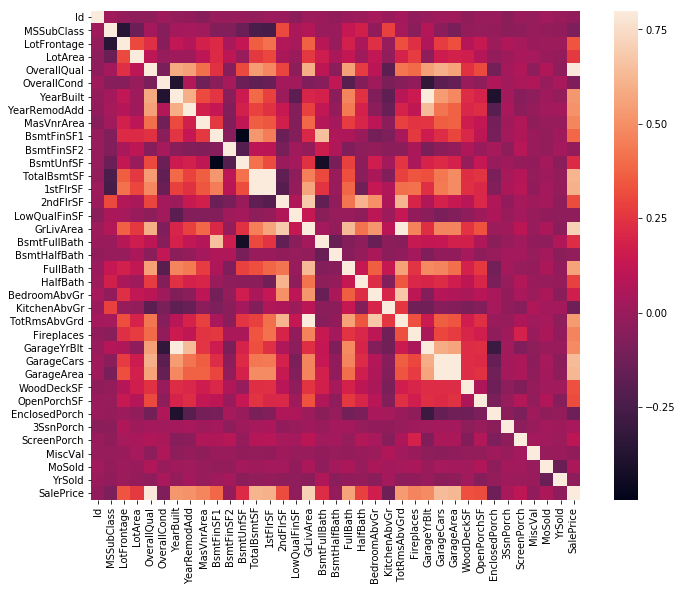

In [46]:
fig = corrmat = house.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot_kws=True);


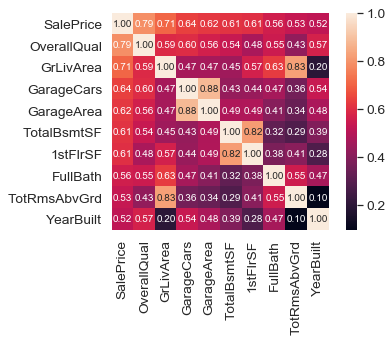

In [47]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Com o grafico acima, conclui que as variaveis, num geral não são super correlacionadas. O PCA sera uma 
abordagem valida.

In [183]:
house['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [184]:
dummie = pd.get_dummies(house, drop_first = True)

In [185]:
dummie.shape

(1460, 246)

In [186]:
dummie.head(1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0


In [187]:
dummie.drop(columns=['Id', 'SalePrice'], inplace=True)
dummie.shape

(1460, 244)

In [188]:
X = dummie
y = house['SalePrice']

In [189]:
X.fillna(0, inplace = True)

In [190]:
print(X.shape)
print(y.shape)

(1460, 244)
(1460,)


In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [192]:
lm = LinearRegression()

In [193]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [194]:
r2_train = lm.score(X_train, y_train)
r2_test = lm.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.93
R2 no set de teste: 0.77


In [195]:
predictions = lm.predict(X_test)

In [196]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

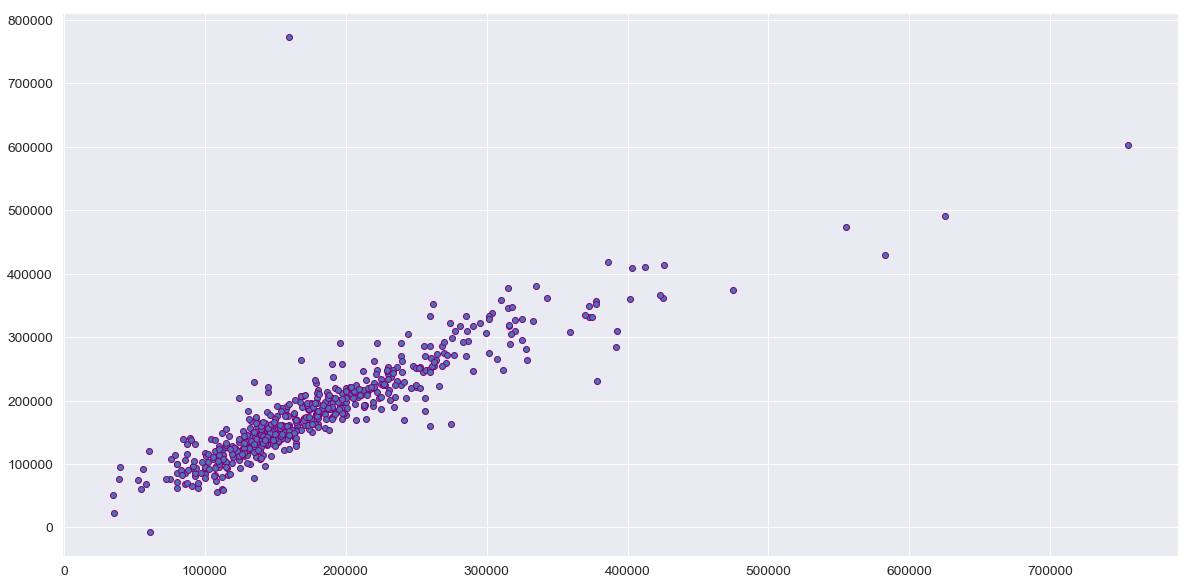

In [124]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(20,10))
plt.scatter(y_test,predictions,edgecolor='purple')

In [64]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 20336.705168728018
MSE: 1469805172.2677093
RMSE: 38338.038190127954


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


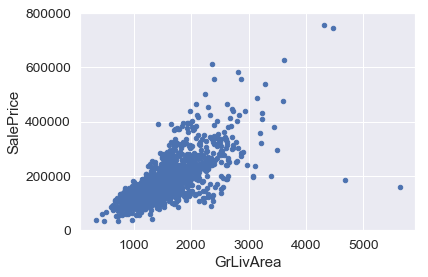

In [72]:
var = 'GrLivArea'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


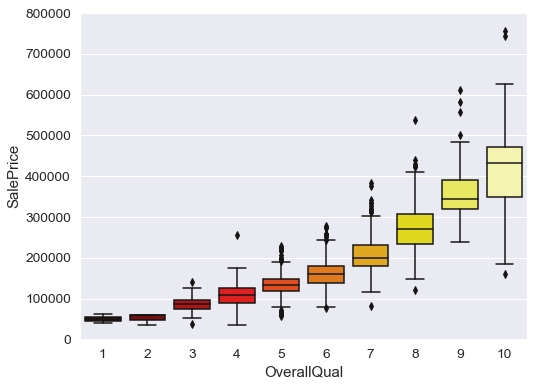

In [75]:
var = 'OverallQual'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data, palette='hot')
fig.axis(ymin=0, ymax=800000);

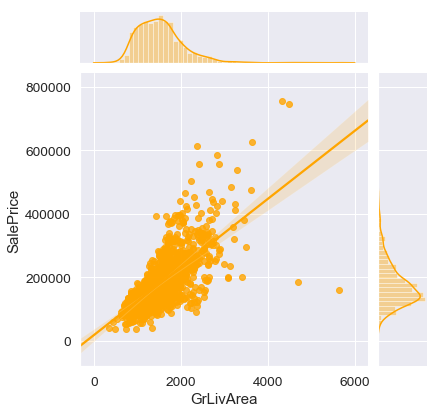

In [76]:
sns.jointplot(x=house['GrLivArea'], y=house['SalePrice'], kind='reg', color = 'orange')

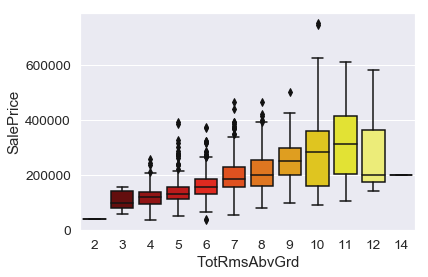

In [77]:

sns.boxplot(x=house['TotRmsAbvGrd'], y=house['SalePrice'],palette = 'hot')

In [125]:
X_std = StandardScaler().fit_transform(X)

In [158]:
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [198]:
X.shape

(1460, 244)

In [199]:
Y_sklearn.shape

(1460, 2)

No handles with labels found to put in legend.


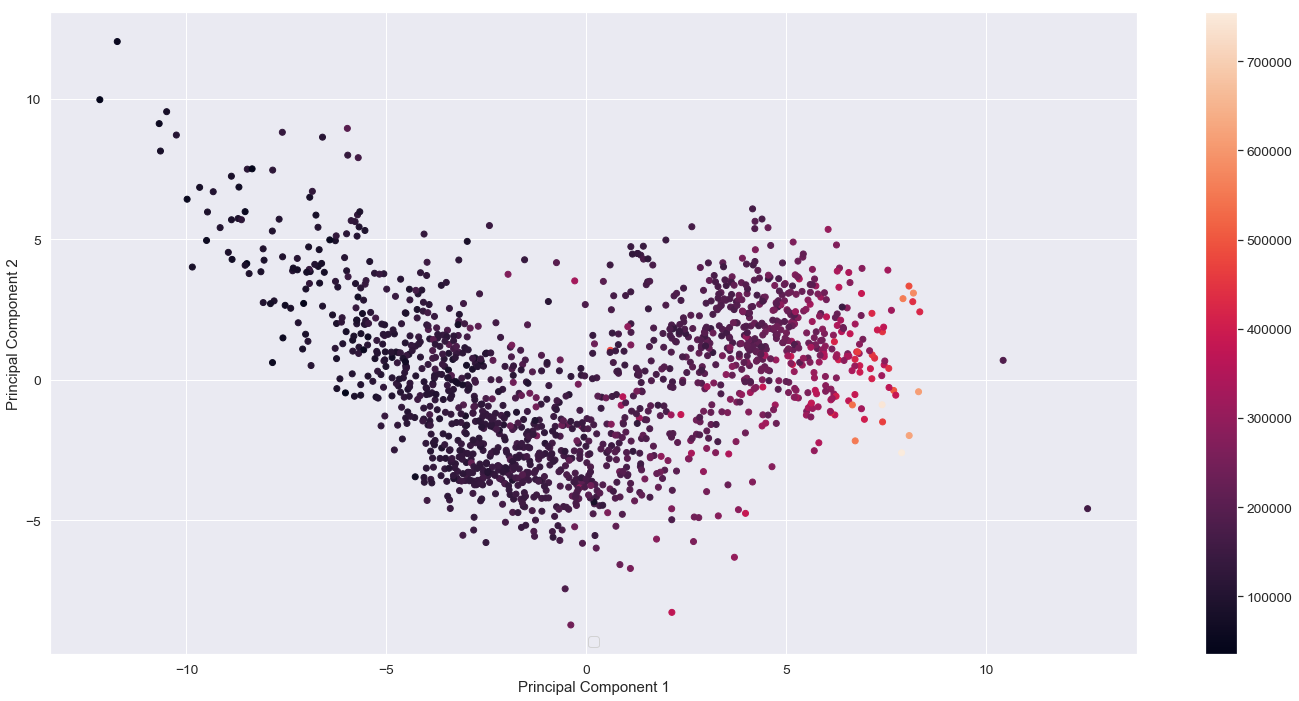

In [200]:
plt.figure(figsize=(20,10))
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1], c=house.SalePrice)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.colorbar()

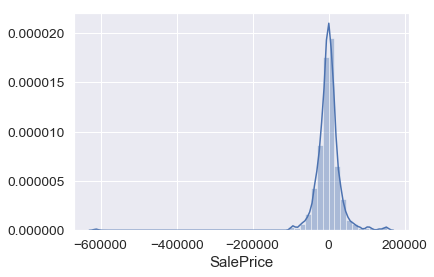

In [181]:
sns.distplot((y_test-predictions),bins=50);